In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Reading the Data using the Engine xlrd - which is used to read the excel file in the format (xls, xlsx)
#openpyxl is used to read and write excel files (xlsx, xlsm, xltx and xltm)
data_1 = pd.read_excel("./L1_LinearRegression/DS1.xls", engine='xlrd')
data_1.head()

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


,X,Y
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


In [5]:
#Finding if the Dataset has any na values or null values
print(data_1.isna().values.any())
print(data_1.isnull().values.any())

False
False


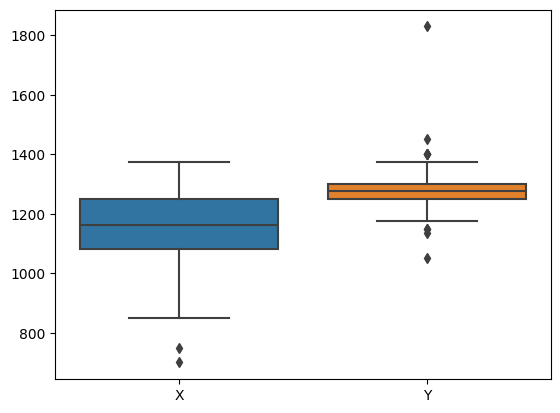

In [6]:
#Visulizing the Dataset to find whether we have any outliers
import seaborn as sns
sns.boxplot(data_1) #Box Plot
plt.show()

In [7]:
#Identifying and Removing Outliers in the Dataset using IQR (Interquartile range)

import numpy as np

#Calculating the Interquartile Range for X
x_q25, x_q75 = np.percentile(data_1['X'], 25), np.percentile(data_1['X'], 75, method='midpoint')
x_iqr = x_q75 - x_q25
print('Percentiles (X): 25th=%.3f, 75th=%.3f, IQR=%.3f' %(x_q25, x_q75, x_iqr))

#Calculating the Interquartile Range for Y
y_q25, y_q75 = np.percentile(data_1['Y'], 25), np.percentile(data_1['Y'], 75, method='midpoint')
y_iqr = y_q75 - y_q25
print('Percentiles (Y): 25th=%.3f, 75th=%.3f, IQR=%.3f' %(y_q25, y_q75, y_iqr))

#Calculating the Outlier cutoff (i.e. defining the Upper and lower bounds)

#Base values of X
x_cut_off = x_iqr * 1.5
x_lower, x_upper = x_q25 - x_cut_off, x_q75 + x_cut_off

#Base values of Y
y_cut_off = y_iqr * 1.5
y_lower, y_upper = y_q25 - y_cut_off, y_q75 + y_cut_off

#Identifying the Outliers
#In X
x_upper_array = np.array(data_1['X']>=x_upper)
print("Upper Bound: ", x_upper)
print("No. of Outliers of X above the upper bound: ", x_upper_array.sum())

x_lower_array = np.array(data_1['X']<= x_lower)
print("Lower Bound: ", x_lower)
print("No. of Outliers of X below the lower bound: ", x_lower_array.sum())

print("No. of Outliers of X: ", x_upper_array.sum() + x_lower_array.sum())

#In Y
y_upper_array = np.array(data_1['Y']>=y_upper)
print("Upper Bound: ", y_upper)
print("No. of Outliers of Y above the upper bound: ", y_upper_array.sum())

y_lower_array = np.array(data_1['Y']<= y_lower)
print("Lower Bound: ", y_lower)
print("No. of Outliers of Y below the lower bound: ", y_lower_array.sum())

print("No. of Outliers of Y: ", y_upper_array.sum() + y_lower_array.sum())

Percentiles (X): 25th=1080.000, 75th=1250.000, IQR=170.000
Percentiles (Y): 25th=1250.000, 75th=1300.000, IQR=50.000
Upper Bound:  1505.0
No. of Outliers of X above the upper bound:  0
Lower Bound:  825.0
No. of Outliers of X below the lower bound:  2
No. of Outliers of X:  2
Upper Bound:  1375.0
No. of Outliers of Y above the upper bound:  7
Lower Bound:  1175.0
No. of Outliers of Y below the lower bound:  5
No. of Outliers of Y:  12


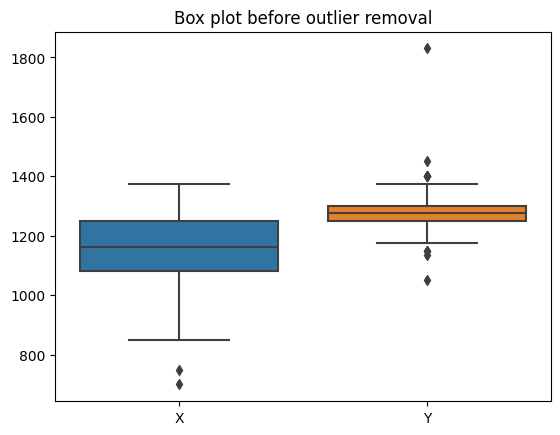

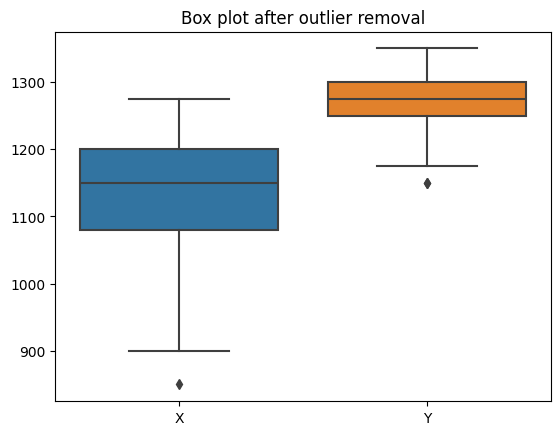

In [8]:
#Removing the Outliers using IQR Method

sns.boxplot(data_1)
plt.title('Box plot before outlier removal')
plt.show()

def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] >= (iqr + np.percentile(df[field_name], 75))].index, inplace=True) #Removing Outliers above the upper bound
    df.drop(df[df[field_name] <= (np.percentile(df[field_name], 25) - iqr)].index, inplace=True) #Removing Outliers below the lower bound

drop_outliers(data_1, 'X')
drop_outliers(data_1, 'Y')
sns.boxplot(data_1)
plt.title('Box plot after outlier removal')
plt.show()

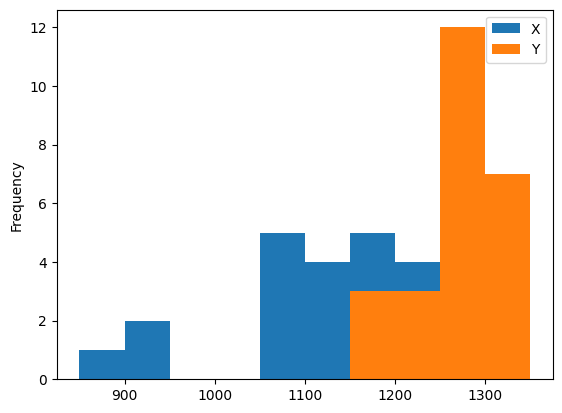

In [9]:
#Finding out which features affects the overall output
data_1.plot(kind='hist')
plt.show()

,X,Y
1,-0.038088,-2.202766
2,-0.376249,-0.935653
3,-0.527532,0.311348
4,-0.260562,0.814171
5,0.184387,0.814171
8,-0.260562,-0.191475
10,1.296760,1.819816
12,0.406862,0.814171
13,0.629336,0.814171
14,0.406862,0.311348


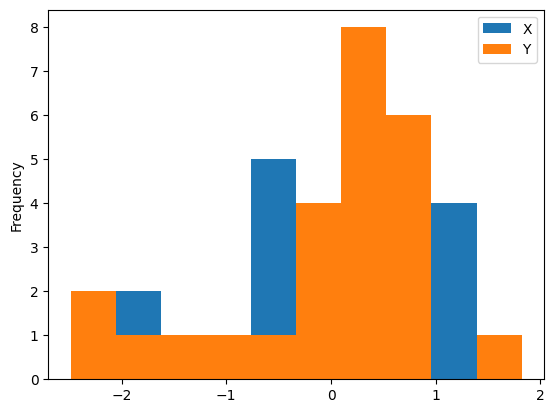

In [10]:
#Copying the Dataset
data_1_copy = data_1.copy()

#Applying the Z-score Normalization Technique
for column in data_1_copy:
    data_1_copy[column] = (data_1_copy[column] - data_1_copy[column].mean()) / data_1_copy[column].std()

#Viewing the Normalized Data
display(data_1_copy)

#Plotting
data_1_copy.plot(kind='hist')
plt.show()

In [11]:
#Splitting the Dataset into training and testing using numpy

data_split = np.random.rand(len(data_1_copy)) < 0.8 #Getting 80% of the overall dataset
train_data = data_1_copy[data_split] #80% data as train_data
test_data = data_1_copy[~data_split] #Remaining data as test_data
print(train_data)
print(test_data)

           X         Y
1  -0.038088 -2.202766
2  -0.376249 -0.935653
3  -0.527532  0.311348
4  -0.260562  0.814171
5   0.184387  0.814171
8  -0.260562 -0.191475
10  1.296760  1.819816
12  0.406862  0.814171
13  0.629336  0.814171
14  0.406862  0.311348
16  1.163276  0.512477
19  0.629336  0.512477
20  0.851811  0.311348
22 -0.483037 -0.191475
25  0.451357 -0.191475
26  0.851811  0.311348
27  0.406862 -0.694298
28  1.074286  0.411912
29  1.074286  0.814171
31 -0.038088 -1.699943
34 -2.040360  0.814171
35 -2.485309 -1.197120
           X         Y
23 -0.438542  0.311348
24 -0.438542 -2.202766
33 -2.040360 -0.191475


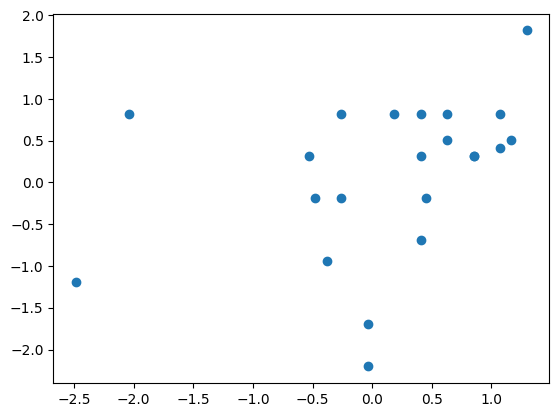

In [12]:
#Plotting the Data

plt.scatter(train_data['X'], train_data['Y'])
plt.show()

In [13]:
#Feature Selection - as array
X = train_data['X'].values
Y = train_data['Y'].values
print("Target: %s, \nFeatures: %s" %(Y, X))

Target: [-2.20276579 -0.93565253  0.31134783  0.81417056  0.81417056 -0.19147489
  1.81981601  0.81417056  0.81417056  0.31134783  0.51247692  0.51247692
  0.31134783 -0.19147489 -0.19147489  0.31134783 -0.69429762  0.41191238
  0.81417056 -1.69994307  0.81417056 -1.19712034], 
Features: [-0.03808766 -0.37624917 -0.52753194 -0.26056234  0.18438701 -0.26056234
  1.29676037  0.40686168  0.62933635  0.40686168  1.16327556  0.62933635
  0.85181102 -0.48303701  0.45135661  0.85181102  0.40686168  1.0742857
  1.0742857  -0.03808766 -2.04035971 -2.48530905]


In [14]:
#Determining the Mean
mean_x = np.mean(X)
mean_y = np.mean(Y)

n = len(X)

print(n)

22


In [15]:
#Calculating the Slope and y-intercept
num = 0
denom = 0

for i in range(n):
    num += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += np.sqrt(((X[i] - mean_x) ** 2) * (Y[i] - mean_y)**2)
r = num/denom
m = r * (np.std(Y) / np.std(X))
c = mean_y - (m * mean_x)

#printing the Coefficients
print("m = ", m)
print("c = ", c)

m =  0.6059085594004243
c =  0.01432675682036215


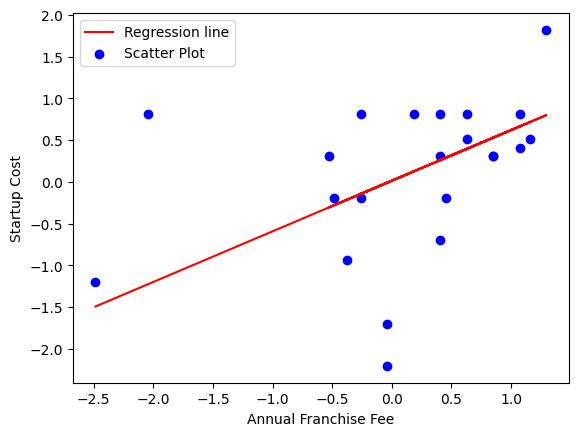

In [16]:
#Plotting the values and Regression Line

#We are increasing the boundary of the regression line by adding 10 units to max of x and subtracting 10 units from the min of x
# max_x = np.max(X) + 10
# min_x = np.min(Y) - 10

# #Line values for x and y
# x = np.linspace(min_x, max_x, 1000) #This line generates a sequence of 100 evenly spaced x-values between min_x and max_x
y = c + m * X



#Plotting the Regression line
plt.plot(X, y, color="Red", label="Regression line")

#Plotting the Scatter Points
plt.scatter(X, Y, color="Blue", label="Scatter Plot")
plt.xlabel("Annual Franchise Fee")
plt.ylabel("Startup Cost")
plt.legend()
plt.show()

In [17]:
#Getting the Values of Test data
X_test = test_data['X'].values
Y_test = test_data['Y'].values

mean_test_X = X_test.mean()
mean_test_Y = Y_test.mean()

In [18]:
#Calculating the Mean Squared Error (MSE)

sq_error = 0 #Squared Error

for i in range(len(X_test)):
    y_pred = c + m * X_test[i]
    sq_error += (Y_test[i] - y_pred)**2

MSE = sq_error / mean_test_Y
print("The Mean Squared Error is: ", MSE)

The Mean Squared Error is:  -7.47001019030964


In [19]:
#Calculating R-Squared value for measuring goodness of our model

sst = 0 #Total Sum of Squares
ssr = 0 #Total Sum of Squares of Residuals

for i in range(len(X_test)):
    y_pred = c + m * X_test[i]
    sst += (Y_test[i] - mean_test_Y) **2
    ssr += (Y_test[i] - y_pred) **2
r2 = 1- (ssr/sst)
print("R-Squared Test: ",r2)

R-Squared Test:  -0.4652409238827724


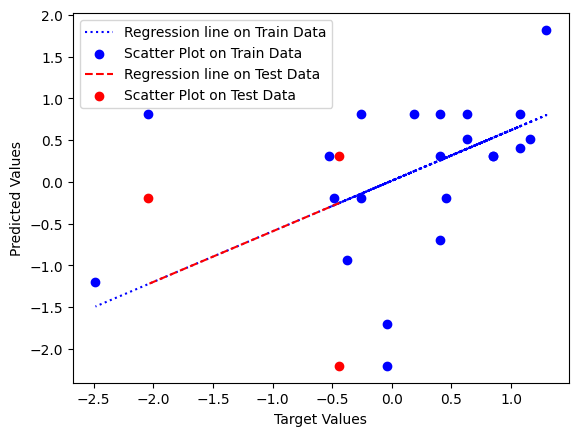

In [20]:
#Plotting the values and Regression Line

#We are increasing the boundary of the regression line by adding 10 units to max of x and subtracting 10 units from the min of x
# max_x = np.max(X) + 10
# min_x = np.min(Y) - 10

# #Line values for x and y
# x = np.linspace(min_x, max_x, 1000) #This line generates a sequence of 100 evenly spaced x-values between min_x and max_x

#Training Dataset
y = c + m * X

#Plotting the Regression line
plt.plot(X, y, color="Blue", label="Regression line on Train Data", linestyle="dotted")

#Plotting the Scatter Points
plt.scatter(X, Y, color="Blue", label="Scatter Plot on Train Data")


#Test Dataset
y_test = c + m * X_test

#Plotting the Regression line
plt.plot(X_test, y_test, color="Red", label="Regression line on Test Data", linestyle="dashed")

#Plotting the Scatter Points
plt.scatter(X_test, Y_test, color="Red", label="Scatter Plot on Test Data")
plt.xlabel("Target Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()